# Spectrum Analysis

In [1]:
import mne
import matplotlib.pyplot as plt

file_name = 'feature_files/segmented-merged-normal-epo.fif'
epochs = mne.read_epochs(file_name)

Reading feature_files/segmented-merged-normal-epo.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
1996 matching events found
No baseline correction applied
0 projection items activated


In [2]:
epochs.info

<Info | 10 non-empty values
 bads: []
 ch_names: Fp1, F3, F7, T3, T5, O1, C4, Status
 chs: 7 EEG, 1 STIM
 custom_ref_applied: False
 dig: 10 items (3 Cardinal, 7 EEG)
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: 2021-03-28 07:50:49 UTC
 meas_id: 4 items (dict)
 nchan: 8
 projs: []
 sfreq: 128.0 Hz
>

200 ms pre stimuls and 500 ms after stimuls

In [3]:
epochs

<EpochsFIF |  1996 events (all good), -0.203125 - 0.5 sec, baseline [-0.203125, 0] sec, ~11.1 MB, data loaded,
 'standard/stimulus': 998
 'target/stimulus': 998>

In [4]:
epochs.get_data()

array([[[ 2.42855804e-05,  2.31886643e-05,  2.34833587e-05, ...,
         -2.63363127e-05, -2.88739557e-05, -2.98398973e-05],
        [-1.27491649e-05, -1.27900885e-05, -1.58417315e-05, ...,
          1.78490918e-05,  1.87084624e-05,  1.76698140e-05],
        [-1.11701729e-05, -7.90186914e-06, -1.20553386e-05, ...,
          7.75024273e-06,  9.46950695e-06,  8.35453829e-06],
        ...,
        [ 1.98972657e-06,  4.43100498e-06,  9.76137289e-06, ...,
         -1.27446247e-05, -5.39189523e-06, -8.99363442e-07],
        [ 1.56267652e-05,  1.57121030e-05,  1.40722213e-05, ...,
         -1.05375511e-05, -8.00738053e-06, -7.07096342e-06],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  4.00000000e+00]],

       [[-5.42940461e-06, -4.75815705e-06, -6.93561879e-06, ...,
         -1.66605241e-05, -2.70894179e-05, -2.20141319e-05],
        [ 2.68803115e-06,  3.15181842e-06,  4.99137695e-06, ...,
         -6.70658119e-06, -4.28046815e

In [5]:
target = epochs["target"].average()


In [6]:
standard = epochs["standard"].average()

In [7]:
target.data.shape

(7, 91)

In [8]:
standard.data.shape

(7, 91)

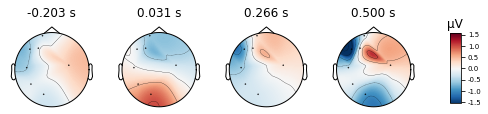

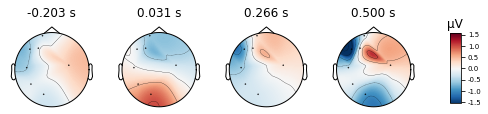

In [9]:
target.plot_topomap()

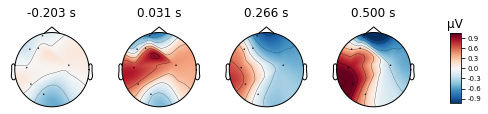

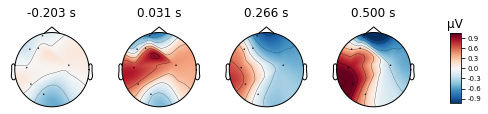

In [10]:
standard.plot_topomap()

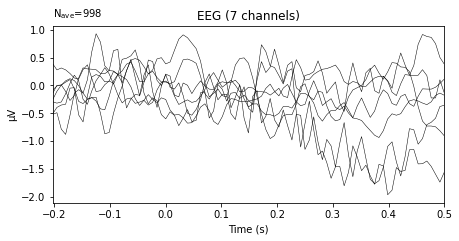

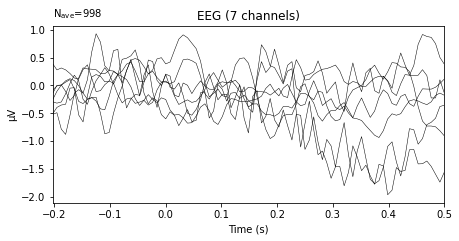

In [11]:
target.plot()

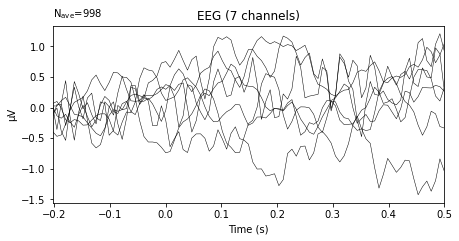

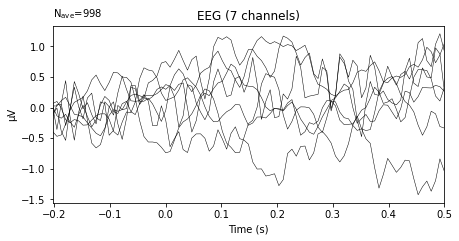

In [12]:
standard.plot()

No projector specified for this dataset. Please consider the method self.add_proj.


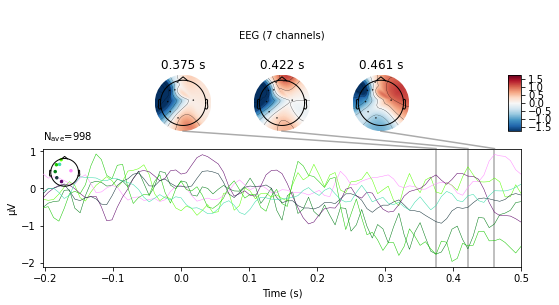

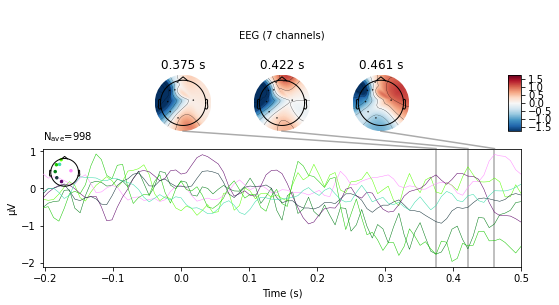

In [13]:
target.plot_joint()

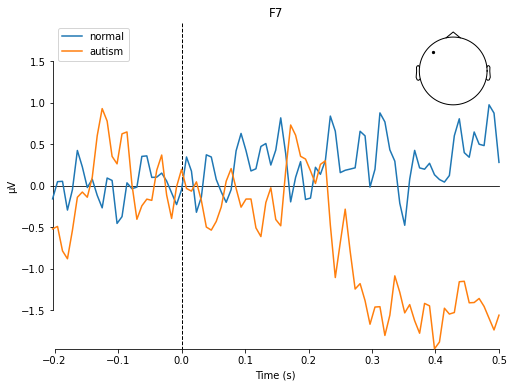

[<Figure size 576x432 with 2 Axes>]

In [14]:
mne.viz.plot_compare_evokeds({"normal": standard, "autism": target}, picks = [2])

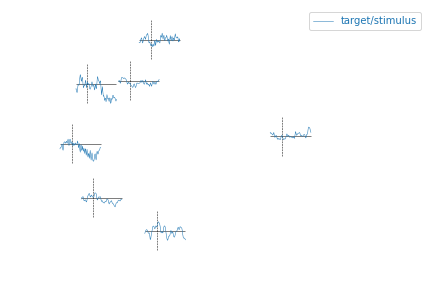

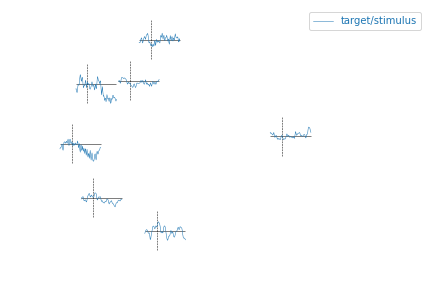

In [15]:
target.plot_topo()

# Time-Frequecy decomposition for spectrum generation 

Below Code is not working in jupyter notebook but working perfectly on Pycharm. Therefore, I have Provide those .py code files in get_spectrum folder.

In [38]:
file_name = 'feature_files/segmented-merged-autism-epo.fif'
epochs_for_tfr = mne.read_epochs(file_name)

Reading feature_files/segmented-merged-autism-epo.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
1996 matching events found
No baseline correction applied
0 projection items activated


# power spectrum(Higher order spectrum) or FFT

    Using multitaper spectrum estimation with 7 DPSS windows


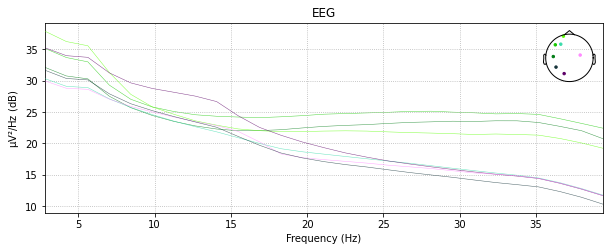

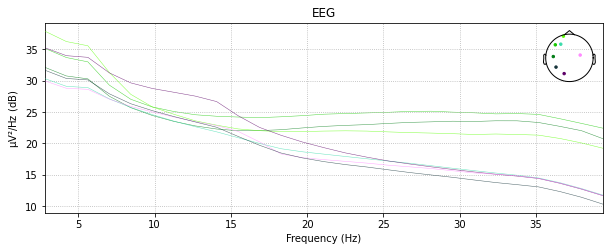

In [39]:
epochs_for_tfr.plot_psd(fmin=2, fmax=40)

In [40]:
dir(mne.time_frequency)

['AverageTFR',
 'CrossSpectralDensity',
 'EpochsTFR',
 '_BaseTFR',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_stft',
 '_stockwell',
 'ar',
 'csd',
 'csd_array_fourier',
 'csd_array_morlet',
 'csd_array_multitaper',
 'csd_fourier',
 'csd_morlet',
 'csd_multitaper',
 'dpss_windows',
 'fit_iir_model_raw',
 'istft',
 'morlet',
 'multitaper',
 'pick_channels_csd',
 'psd',
 'psd_array_multitaper',
 'psd_array_welch',
 'psd_multitaper',
 'psd_welch',
 'read_csd',
 'read_tfrs',
 'stft',
 'stftfreq',
 'tfr',
 'tfr_array_morlet',
 'tfr_array_multitaper',
 'tfr_array_stockwell',
 'tfr_morlet',
 'tfr_multitaper',
 'tfr_stockwell',
 'write_tfrs']

In [41]:
dir(mne.time_frequency)
from mne.time_frequency import tfr_morlet
mne.time_frequency.tfr_morlet?

In [ ]:
freqs = list(range(3, 60))
tfr_target = tfr_morlet(epochs_for_tfr["target"], freqs, 3, return_itc=False)
tfr_standard = tfr_morlet(epochs_for_tfr["standard"], freqs, 3, return_itc=False)

In [ ]:
epochs_for_tfr.save('wavelet_segmented-merged-normal-epo.fif')